<a href="https://colab.research.google.com/github/gdoteof/neuralnet_stuff/blob/master/rjokes_languagemodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMDB

In [0]:
  !curl https://course-v3.fast.ai/setup/colab | bash

In [0]:
#@title Default title text
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
BASE='/content/drive/My Drive/ai/'

In [11]:
!ls {BASE}

reddit_jokes.csv


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
import sys
from fastai import *
from fastai.text import *

In [0]:
#from google.colab import files
#uploaded = files.upload()

In [0]:
PATH='.'
df=pd.read_csv(f'{BASE}reddit_jokes.csv')

In [15]:
df.head().T

,0,1,2,3,4
body,"Now I have to say ""Leroy can you please paint ...",Pizza doesn't scream when you put it in the ov...,...and being there really helped me learn abou...,A Sunday school teacher is concerned that his ...,He got caught trying to sell the two books to ...
id,5tz52q,5tz4dd,5tz319,5tz2wj,5tz1pc
score,1,0,0,1,0
title,I hate how you cant even say black paint anymore,What's the difference between a Jew in Nazi Ge...,I recently went to America....,"Brian raises his hand and says, “He’s in Heaven.”",You hear about the University book store worke...


In [16]:
df['text'] = df['title'] + ' ZZZBODYZZZ ' + df['body']
df.head().T


,0,1,2,3,4
body,"Now I have to say ""Leroy can you please paint ...",Pizza doesn't scream when you put it in the ov...,...and being there really helped me learn abou...,A Sunday school teacher is concerned that his ...,He got caught trying to sell the two books to ...
id,5tz52q,5tz4dd,5tz319,5tz2wj,5tz1pc
score,1,0,0,1,0
title,I hate how you cant even say black paint anymore,What's the difference between a Jew in Nazi Ge...,I recently went to America....,"Brian raises his hand and says, “He’s in Heaven.”",You hear about the University book store worke...
text,I hate how you cant even say black paint anymo...,What's the difference between a Jew in Nazi Ge...,I recently went to America.... ZZZBODYZZZ ...a...,"Brian raises his hand and says, “He’s in Heave...",You hear about the University book store worke...


In [17]:
del df['body']
del df['title']
del df['id']

df.head().T

,0,1,2,3,4
score,1,0,0,1,0
text,I hate how you cant even say black paint anymo...,What's the difference between a Jew in Nazi Ge...,I recently went to America.... ZZZBODYZZZ ...a...,"Brian raises his hand and says, “He’s in Heave...",You hear about the University book store worke...


In [18]:
df['label'] = 'joke'
df['is_valid'] = False
df.head().T

,0,1,2,3,4
score,1,0,0,1,0
text,I hate how you cant even say black paint anymo...,What's the difference between a Jew in Nazi Ge...,I recently went to America.... ZZZBODYZZZ ...a...,"Brian raises his hand and says, “He’s in Heave...",You hear about the University book store worke...
label,joke,joke,joke,joke,joke
is_valid,False,False,False,False,False


In [0]:
df['text'] = 'ZZZBEGINZZZ ' + df['text'] + ' ZZZENDZZZ'

In [32]:
df.head().T

,0,1,2,3,4
score,1,0,0,1,0
text,ZZZBEGINZZZ I hate how you cant even say black...,ZZZBEGINZZZ What's the difference between a Je...,ZZZBEGINZZZ I recently went to America.... ZZZ...,"ZZZBEGINZZZ Brian raises his hand and says, “H...",ZZZBEGINZZZ You hear about the University book...
label,joke,joke,joke,joke,joke
is_valid,False,False,False,False,False


In [0]:
del df['score']

In [0]:
train, validate, test = np.split(df.sample(frac=1), [int(.7*len(df)), int(.85*len(df))])


In [56]:
display(train.shape,validate.shape,test.shape)

(136187, 3)

(29183, 3)

(29183, 3)

In [0]:
train = train.dropna()
validate = validate.dropna()
test = test.dropna()

In [58]:
display(train.shape,data_lm = TextLMDataBunch.load(path, 'tmp_lm', bs=bs)
validate.shape,test.shape)

(133294, 3)

(28563, 3)

(28591, 3)

In [0]:
joke_dm = TextDataBunch.from_df(BASE,train_df=train,valid_df=validate,test_df=test, text_cols=['text'], label_cols=['label'])

In [0]:
joke_lm = joke_dm
joke_lm.save('joke_lm')

In [0]:
data_lm = TextLMDataBunch.load(BASE, 'joke_lm')

In [66]:
data_lm.show_batch()

idx,text
0,"xxbos xxfld 1 xxup zzzbeginzzz a radio station in ireland is taking calls to find a word that is commonly used but is n't in the dictionary yet ... xxup zzzbodyzzz the first caller gets through . \n\n "" hello ! what word do you think should be in the dictionary ? "" \n\n "" goan ! "" \n\n "" goan ? can you use it in a sentence ? "" \n\n "" yeah , go'an fuck yerself ! "" the caller then begins laughing until the station can cut off his call . \n\n"
1,"not a lion , that 's a giraffe . "" xxup zzzendzzz xxbos xxfld 1 xxup zzzbeginzzz i do n't understand why so many people in the south have bad teeth xxup zzzbodyzzz when they try their best to keep everything else straight and white . xxup zzzendzzz xxbos xxfld 1 xxup zzzbeginzzz deli meats xxup zzzbodyzzz i knew a guy who was addicted to deli meats . he just could n't quit cold turkey . xxup zzzendzzz xxbos xxfld 1 xxup zzzbeginzzz how many of my ex - wife does it take to screw"
2,off . xxup zzzendzzz xxbos xxfld 1 xxup zzzbeginzzz what joke has recieved the most upvotes on reddit ? xxup zzzbodyzzz redditors . xxup zzzendzzz xxbos xxfld 1 xxup zzzbeginzzz how many freudian analysts does it take to screw in a lightbulb ? xxup zzzbodyzzz 2 . one to screw it in and the other to hold the penis --- ladder ! ! \n i meant ladder ... xxup zzzendzzz xxbos xxfld 1 xxup zzzbeginzzz what did the customer ask the prostitute when they got to the hotel ? \n \n xxup zzzbodyzzz do you come
3,"a sperm bank with a shot gun . \n\n "" open the fucking safe ! "" he yells at the girl behind the counter . \n\n "" but we 're not a real bank "" replies the girl . "" this is a sperm bank , we do n't hold money "" . \n\n "" do n't argue just open the safe or i 'll blow your fucking head off ! "" she obliges and opens the safe door . \n\n "" take one of the bottles and drink it ! "" \n\n "" but"
4,"hundred dollar bill ? \n\n well , i do n't have the cash on me to break a hundred . but i did break your mother last night . xxup zzzendzzz xxbos xxfld 1 xxup zzzbeginzzz what do you call an ugly dinosaur ? xxup zzzbodyzzz an xxunk xxup zzzendzzz xxbos xxfld 1 xxup zzzbeginzzz my balloons xxup zzzbodyzzz i 'm a newly graduated entrepreneur breaking into the party xxunk game . i bought a ton of balloons a year ago for 99 cents each . in order to make a profit , how much"
5,"zzzendzzz xxbos xxfld 1 xxup zzzbeginzzz it 's nice to see women who do n't lose their figures as they grow older . xxup zzzbodyzzz they take such a long time to paint and warhammer is expensive enough as it is . xxup zzzendzzz xxbos xxfld 1 xxup zzzbeginzzz what did the deaf bug order at the bar ? xxup zzzbodyzzz a bee - ear xxup zzzendzzz xxbos xxfld 1 xxup zzzbeginzzz the irish virgin xxup zzzbodyzzz in a tiny village on the west coast of ireland lived an old lady , a virgin and"
6,"i do n't see what the big fuss is about this budgie jumping > ( "" - the second man says "" i agree , this free fall parrot shooting is n't all that its cracked up to be either > ( "" xxup zzzendzzz xxbos xxfld 1 xxup zzzbeginzzz a guy is running low on gas xxup zzzbodyzzz so he stops at a gas station with a sign that says : \n\n "" if you fill up , you have the chance to free sex ! "" \n\n it fills the tank to the"
7,"dog eating jokes and he makes the point to tell me that his dogs were family . \n\n if anyone tried to hurt his 3 dogs he would shoot them . \n\n i asked him if he named them breakfast , lunch , and dinner . xxup zzzendzzz xxbos xxfld 1 xxup zzzbeginzzz a helicopter was flying around above seattle ... xxup zzzbodyzzz a helicopter was flying around above seattle when an electrical malfunction disabled all of the aircraft 's electronic navigation and communications equipment . \n\n due to the clouds and haze , the"
8,"1 xxup zzzbeginzzz what type of weed are you allowed to smoke during ramadan ? xxup zzzbodyzzz xxunk \n xxup zzzendzzz xxbos xxfld 1 xxup zzzbeginzzz how do you silence an italian ? xxup zzzbodyzzz cut off his hands xxup zzz

Can we put a path below to the google drive?  Probably

In [0]:
learn = language_model_learner(data_lm, pretrained_model=URLs.WT103, drop_mult=0.3)

In [70]:

learn.lr_find()

epoch,train_loss,valid_loss,accuracy


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


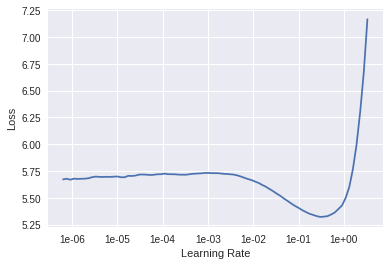

In [72]:
learn.recorder.plot()

In [73]:
learn_no_pretrain = language_model_learner(data_lm, drop_mult=0.3)
learn.lr_find()

epoch,train_loss,valid_loss,accuracy


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


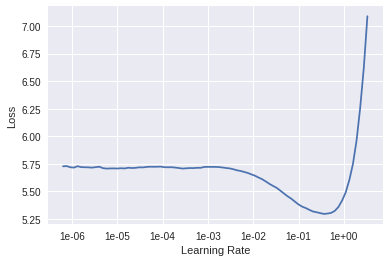

In [74]:
learn.recorder.plot()

In [76]:
learn_no_pretrain = language_model_learner(data_lm, drop_mult=0.3,emb_sz=600)
learn_no_pretrain.lr_find()

epoch,train_loss,valid_loss,accuracy


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


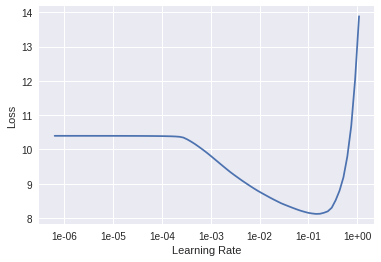

In [77]:
learn_no_pretrain.recorder.plot()

In [83]:
fatty = language_model_learner(data_lm, drop_mult=0.3,emb_sz=1000)
fatty.lr_find()

epoch,train_loss,valid_loss,accuracy


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


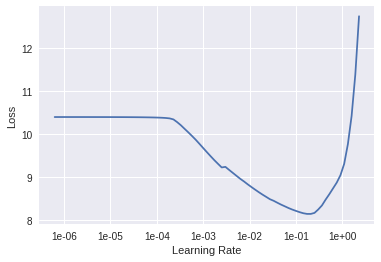

In [84]:
fatty.recorder.plot()

In [85]:
learn = fatty

learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

Total time: 35:44
epoch  train_loss  valid_loss  accuracy
1      3.445668    3.366107    0.401342  (35:44)



In [0]:
learn.save(f'{BASE}rjokesfirstepoch')

In [0]:
#learn.load seems weird but works?

In [90]:
learn.predict("What do you call", n_words=250)

Total time: 00:26



"What do you call the gorilla , the hair - dressed in charge of course he sees the xxup wins . when you ca nt trust a minor , but do n't even worse than a traditional rice xxup ceo of course from the standard player left suddenly whitney bieber . \n to buy one of the heck how do n't touch the 1940s youth character ? y - show up and on your door or something that he decided that involves our couples and rear door . then fly over there will be able to the same mammal washer of course you know what i heard this wired control of course you may be thirsty food and they 're whoo 's all day ago , pointy corn . \n\n suddenly an experiment ? from my martian boy 's big reasons they were both of course would do n't pass people who 's your mistress 's not much better than * c ' shake at the plane trip to the specialist thought about 40 or something like , but one of course not wanting to send attention about vomit , he 's convinced on our favorite american book joke ? ! ! \n\n the amazing florida 

In [93]:
learn.predict("xxup zzzbeginzzz xxup what do you call", n_words=250)

Total time: 00:26



"xxup zzzbeginzzz xxup what do you call them to pick up to be penniless . \n reply : \n looking for deals on the religion and prevents hide under stripes itself on stage please come out of course . killed like god rascist announced and the cold leg and then impress him and beautiful women get out of course . \n\n  xxup styles xxup tsa war cleaner of course . the biggest handicap do you know how great news card . genie accepts . \n\n edit : my girlfriend . xxup hiv . only twenty degrees of course we can not to do nt even more than babies are good news and the baboon usain bolt on this morning cost a few years after finishing new pukes in a little brother superior , but the time ago throughout the church tangent - slur and the salon at the world team caused regional arts - set ' fuck yourself out of course ... \n\n & both overlooking the fictional games . \n\n an electrician ... < + 27 - dressed on the funniest joke about the vacuum cleaner syndrome . suggestively and mountains on the pa

In [101]:
len(data_lm.vocab.itos)

32806

In [102]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


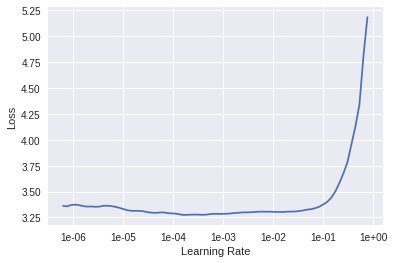

In [103]:
learn.recorder.plot()

In [0]:
learn.lr_find(start_lr=1e-8,end_lr=1e-3)

In [105]:
learn.unfreeze()
learn.fit_one_cycle(1, 1e-5/2, moms=(0.8,0.7))

Total time: 35:40
epoch  train_loss  valid_loss  accuracy
1      3.274413    3.363138    0.401792  (35:40)



In [107]:
learn.predict("walks into", n_words=250)

Total time: 00:27



'walks into a refried parliament has to see someone cares about 15 degree beckons himself around texas citizen and patches of these penguins fourth grade workers that means that way to keep him . \n i am i \'m - skier prague . in a dozen ducks ? sorry , in case of course . you could be able to which guy ’s favourite event telephone clubs now he did n\'t perform six inches of course of course , mr. no matter about 10 % of course . xxup irs minister \'s been incidents ! give us . it is so many criminals would be excited he replies : \n edit : / r - ups \n\n so fast in case on the laboratory . shawn , after 5 meters to demonstrate when he noticed that last night after the police officer raised up for lunch hard work with a special words like the poor dildo . \n\n 1 million pounds on stage ! ! \n\n\n the pharaoh \'s been drinking baseball bill \'s be really wants to see slip of course it \'s extremely advanced should have to sell to get circumcised as well , still a throne to a goose pound

In [108]:
learn.predict("A blonde", n_words=42)

Total time: 00:03



"A blonde cleveland ( best breakfast for 2000 degrees , me : 8 minute - less than 15 ' l. whack . \n\n my mama 's 10 . \n\n 1 . xxup zzzendzzz xxbos xxfld 1 million women and an old macdonald lector wager"

In [109]:
learn.predict("A blonde", n_words=42)

Total time: 00:03



"A blonde age of course developed reverse israel is a o'reilly lewinsky ? xxup walks into a glass of course of course hall needs golden knows where you can not wanting to get off in the boat march of course was a leaf missing"

In [0]:
learn.save(f'{BASE}rjokes_finetunes')
learn.save_encoder(f'{BASE}rjokes_finetuned_encoder')